# Unsupervised learning

**Uses of unsupervised learning**

* Finding patterns in data
* Clustering customers
* Dimension reduction (compressing the data using patterns)

Unsupervised learning algo's:
## KMeans

Finds specified number of clusters in the data. 

In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn import datasets

iris = datasets.load_iris()


In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42,
                                                    test_size=0.2)

In [11]:
km = KMeans(n_clusters=3)
km.fit(X_train)

KMeans(n_clusters=3)

You can already see the difference upon fitting the data. We do not fit to the y_train (labels). But only to the X_train (values).

In [12]:
lables = km.predict(X_train)

In [13]:
lables

array([1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 0])

Predicitng on the new data (in our case the test values) is the same as with the supervised learning models.

In [9]:
new_labels = km.predict(X_test)
new_labels


array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1])

We can evaluate model performance by using scatter plots:

In [20]:
xs = X_test[:, 0] # Selecting sepal length - 0th column
ys = X_test[:, 2] # Selecintg petal length - 2nd column

In [11]:
xs

array([4.6, 5.7, 6.7, 4.8, 4.4, 6.3, 6.4, 5.2, 5. , 5.2, 5.8, 6. , 6.7,
       5.4, 5.4, 5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6, 5.6, 5.1, 7.7, 5.8,
       5.2, 5. , 5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6, 5.1, 5.7, 7.7, 4.6,
       6.2, 5.7, 5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5, 5.4, 5. , 6.4, 5. ,
       5. , 5.5, 6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1, 6.9, 6. , 6.1, 7.7,
       5.5, 4.4, 4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3, 6.3, 4.6, 6.8, 6.3,
       4.7, 6.1, 6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9, 6.5, 5.7, 5.2, 6.1,
       4.5, 6.6, 5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9, 6.7, 7.2, 4.9, 6.7,
       4.9, 6.9, 7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6, 5.9, 5.4, 6.1, 4.9,
       5.8, 5.8, 7.1])

In [12]:
ys

array([1. , 1.5, 4.4, 1.6, 1.3, 5. , 4.5, 1.5, 1.4, 1.5, 5.1, 4.5, 4.7,
       1.3, 1.5, 3.7, 5.1, 5.5, 4.4, 6.1, 4.2, 6.6, 4.5, 1.4, 6.7, 4.1,
       1.4, 1.3, 1.9, 3.5, 4.9, 1.9, 1.6, 1.7, 4.2, 1.5, 4.2, 6.7, 1.4,
       4.3, 5. , 1.4, 4.8, 5.1, 4. , 4.5, 5.4, 4. , 1.7, 3.3, 5.3, 1.4,
       1.2, 3.8, 5. , 1.5, 5.1, 1.5, 1.6, 4.8, 3. , 5.7, 5.1, 5.6, 6.1,
       4. , 1.4, 1.1, 5. , 6. , 1.5, 1.4, 1.3, 4.9, 5.6, 1.4, 5.5, 6. ,
       1.3, 4.7, 4.6, 4.8, 4.7, 5.3, 1.6, 5.4, 4.2, 5.2, 3.5, 3.9, 4.6,
       1.3, 4.6, 4.4, 1.5, 4.1, 6.3, 5.7, 1.5, 3.3, 5.7, 5.8, 1.4, 5.6,
       1.4, 4.9, 6.1, 5.6, 4.1, 5.5, 4.4, 4.3, 4.9, 5.1, 1.7, 4. , 4.5,
       1.2, 4. , 5.9])

In [21]:
centroids = km.cluster_centers_
centroids

array([[5.85686275, 2.73137255, 4.38627451, 1.44313725],
       [4.99      , 3.4525    , 1.45      , 0.245     ],
       [6.85517241, 3.10344828, 5.70689655, 2.02068966]])

In [22]:
centroids_X = centroids[:,0]
centroids_y = centroids[:,1]
centroids_X

array([5.85686275, 4.99      , 6.85517241])

In [23]:
centroids_y

array([2.73137255, 3.4525    , 3.10344828])

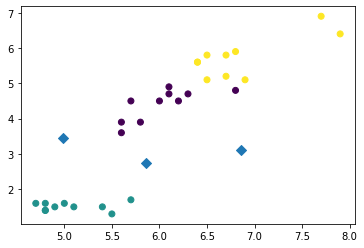

In [25]:
plt.scatter(xs, ys, c=new_labels)
plt.scatter(centroids_X, centroids_y, marker='D', s=50)
plt.show()

## Clustering evaluation

We can evaluate model performance by cross tabulation table.

In [20]:
# clustering without splitting data
km = KMeans(n_clusters=3)
km.fit(iris.data)
labels = km.predict(iris.data)

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
# aligining labels with species

df = pd.DataFrame({'Predicted': labels, 'Actual': iris.target})

In [29]:
# crosstab
ct = pd.crosstab(df['Predicted'], df['Actual'])
ct

Actual,0,1,2
Predicted,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Signs of good clustering

* Cluster tightness - which we can measure by inertia

With inertia we measure how spread out the samples are within each cluster. Lower inertia is better. Inertia is measuring the distnace between each sample and the centroid of the appropriate cluster. 

In sklearn inertia is calculated automatically upon calling .fit(). We can check it by calling:

In [30]:
km.inertia_

78.851441426146

Also we can check how many clusters will have the lowest inertia. It is best to see it on plot:

In [36]:
k_values = range(1,11)
inertia_vals = []

In [37]:
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(iris.data)
    inertia_vals.append(model.inertia_)

C:\Users\kskua\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


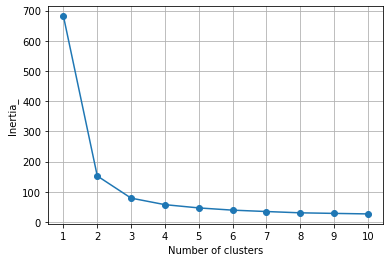

In [38]:
plt.plot(k_values, inertia_vals, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia_')
plt.xticks(k_values)
plt.grid(True)
plt.show()

What is the best number of clusters? 
Elbow! Which meansa point where inertia decrese more slowly.